In [2]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)

In [5]:
plt.scatter(X_data, y_data)

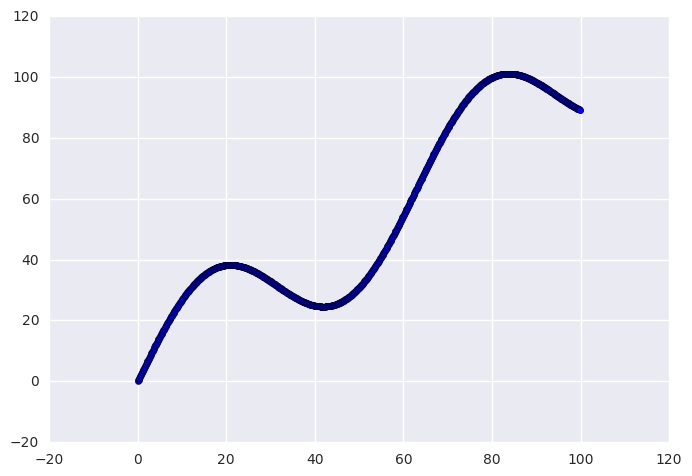

In [6]:
plt.show()

In [25]:
n_samples = 1000
batch_size = 100

# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))
print(type(X_data[0][0]))
# Define placeholders for input
X = tf.placeholder(np.float64, shape=(batch_size, 1))
y = tf.placeholder(np.float64, shape=(batch_size, 1)) 

<class 'numpy.float64'>


In [26]:
# Define variables to be learned
with tf.variable_scope("linear-regression"):
    print("hello")
    W = tf.get_variable("weights", (1, 1), initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,), initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y - y_pred)**2/n_samples)

hello


ValueError: Variable linear-regression/weights already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-8-68291161d801>", line 4, in <module>
    W = tf.get_variable("weights", (1, 1), initializer=tf.random_normal_initializer())
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):


In [27]:
opt = tf.train.AdamOptimizer()
opt_operation = opt.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    indices = np.random.choice(n_samples, batch_size)
    X_batch = X_data[indices]
    y_batch = y_data[indices]
    for _ in range(500):
        print(type(X_batch[0][0]), y_batch.shape)
        sess.run([opt_operation], feed_dict={X: X_batch, y: y_batch})


<class 'numpy.float64'> (100, 1)


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [100,1]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[100,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-28d0c66c8aba>", line 8, in <module>
    X = tf.placeholder(tf.float32, shape=(batch_size, 1))
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1587, in placeholder
    name=name)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2043, in _placeholder
    name=name)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [100,1]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[100,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [3]:
tf.__version__


'0.12.1'

In [28]:
   
# Sample code to run full gradient descent:
# Define optimizer operation
opt_operation = tf.train.AdamOptimizer().minimize(loss)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for _ in range(500):
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X: X_batch, y: y_batch})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [100,1]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[100,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-28d0c66c8aba>", line 8, in <module>
    X = tf.placeholder(tf.float32, shape=(batch_size, 1))
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1587, in placeholder
    name=name)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2043, in _placeholder
    name=name)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/vagrant/anaconda2/envs/py35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [100,1]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[100,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
